In [18]:
import os
import pandas as pd

In [19]:
data_dir=r"C:\Users\Swastik\Desktop\Dono Consulting\Deloitte_Training\decision-tree"
os.chdir(data_dir)

In [20]:
dat=pd.read_csv("dm.csv")
dat.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id'],
      dtype='object')

In [21]:
dat.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [22]:
X=dat.drop(['Cust_Id','AmountSpent'],axis=1)

In [23]:
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,Old,Female,Own,Single,Far,47500,0,High,6
1,Middle,Male,Rent,Single,Close,63600,0,High,6
2,Young,Female,Rent,Single,Close,13500,0,Low,18
3,Middle,Male,Own,Married,Close,85600,1,High,18
4,Middle,Female,Own,Single,Close,68400,0,High,12


In [24]:
X=pd.get_dummies(X)

In [25]:
X.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [26]:
y=dat['AmountSpent']

In [27]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [28]:
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(max_depth=3)
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [29]:
reg.score(X_test,y_test)

0.5915701153457273

In [30]:
reg.feature_importances_

array([0.68060902, 0.        , 0.17771448, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03685946,
       0.04537282, 0.05944422])

In [31]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

Salary            0.680609
Catalogs          0.177714
History_Medium    0.059444
History_Low       0.045373
History_High      0.036859
dtype: float64

In [32]:
import pydotplus
import graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
os.chdir(data_dir)

In [33]:
dot_data = tree.export_graphviz(reg, out_file=None, 
                         feature_names=X.columns,    
                         filled=True, rounded=True,  
                         special_characters=True)

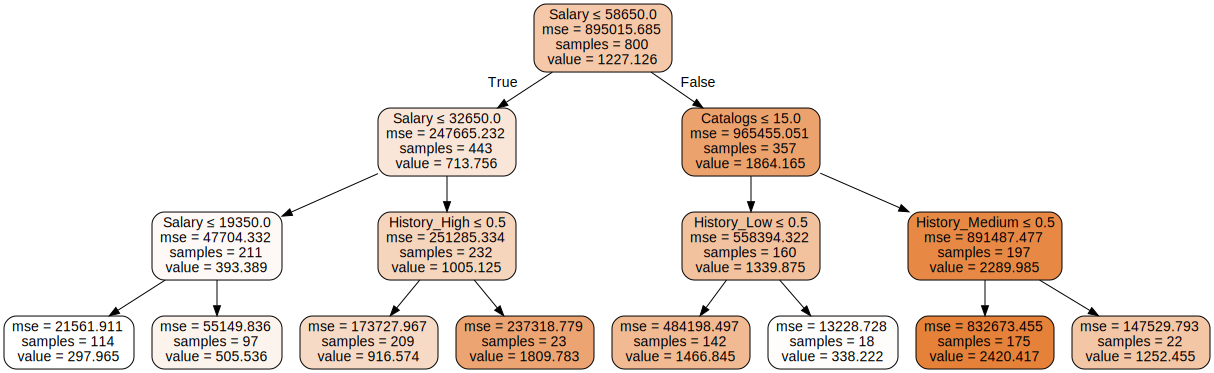

In [34]:
graph = graphviz.Source(dot_data, format="png") 
graph

In [35]:
graph.render('dt_regressor',view=True)

'dt_regressor.png'

the first split occurs on the salary variable. And these are my decision nodes. We can see some other numbers as well in these decision nodes. For example, we can see a number called values in each of these decision nodes. This number corresponds to the average of our target variable which in this case is the amount spent. You can also see some other numbers here for example, you can see that samples= 114 in this node, 97 in this node. This talks about the total number of observations corresponding to this subset of our data. Also, you can notice that mean squared errors are also reported for each of our splits.

Now, decision tree models are regularly used in the business setting to create segments in the data. Let’s see how we can use this decision tree to figure out segments in our data set.

(go to excel) What I have done here is, I have noted down the rules corresponding to all of my decision nodes. I have also noticed down the average value of amount spent in each of my decision nodes, the sample size and I also know what is the global average of amount spent column in my total data set. Now, I can always compare the total average of the amount spent column with the average in each of the segments or each of the nodes created by my decision tree. Now, this output can be interpreted as segments. For example, we can say this, this and this are three different segments in our data set in which the average of amount spent is more than the population average of amount spent, or in other words we can say that these are the three segments in our data in which people tend to spend more.

In [1]:
# from IPython.display import Image
# Image(graph.create_png())